In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sns.set()

In [2]:
data = pd.read_excel('Flight price prediction.xlsx')


In [3]:
data.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,Air India,2022-08-19,New Delhi,Mumbai,DEL → BOM,07:00:00,09:50:00,2h 50m,Non-Stop,No info,4065
1,Go First,2022-09-27,New Delhi,Bangalore,DEL → BLR,05:50:00,08:20:00,2h 30M,Non-Stop,No info,4590
2,IndiGo,2022-03-24,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,Non-Stop,No info,3897
3,Air India,2022-05-01,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
4,Jet Airways,2022-06-09,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1501 entries, 0 to 1500
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   Airline          1501 non-null   object        
 1   Date_of_Journey  1501 non-null   datetime64[ns]
 2   Source           1501 non-null   object        
 3   Destination      1501 non-null   object        
 4   Route            1501 non-null   object        
 5   Dep_Time         1501 non-null   object        
 6   Arrival_Time     1501 non-null   object        
 7   Duration         1501 non-null   object        
 8   Total_Stops      1501 non-null   object        
 9   Additional_Info  1501 non-null   object        
 10  Price            1501 non-null   int64         
dtypes: datetime64[ns](1), int64(1), object(9)
memory usage: 129.1+ KB


In [5]:
data["Duration"].value_counts()

2h 50m     86
2h 45m     50
2h 55m     48
1h 30m     45
2h 35m     44
           ..
28h 10m     1
22h 30m     1
34h 5m      1
23h 15m     1
21h 50m     1
Name: Duration, Length: 285, dtype: int64

In [6]:
data.dropna(inplace = True)

In [7]:
data.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              0
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        0
Additional_Info    0
Price              0
dtype: int64

# EDA
From description we can see that Date_of_Journey is a object data type,\ Therefore, we have to convert this datatype into timestamp so as to use this column properly for prediction

For this we require pandas to_datetime to convert object data type to datetime dtype.

In [8]:
data["Journey_day"] = pd.to_datetime(data.Date_of_Journey, format="%d/%m/%Y").dt.day

In [9]:
data["Journey_month"] = pd.to_datetime(data["Date_of_Journey"], format = "%d/%m/%Y").dt.month

In [10]:
data.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Journey_day,Journey_month
0,Air India,2022-08-19,New Delhi,Mumbai,DEL → BOM,07:00:00,09:50:00,2h 50m,Non-Stop,No info,4065,19,8
1,Go First,2022-09-27,New Delhi,Bangalore,DEL → BLR,05:50:00,08:20:00,2h 30M,Non-Stop,No info,4590,27,9
2,IndiGo,2022-03-24,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,Non-Stop,No info,3897,24,3
3,Air India,2022-05-01,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662,1,5
4,Jet Airways,2022-06-09,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882,9,6


In [14]:
data.head()

,Airline,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Journey_day,Journey_month
0,Air India,New Delhi,Mumbai,DEL → BOM,07:00:00,09:50:00,2h 50m,Non-Stop,No info,4065,19,8
1,Go First,New Delhi,Bangalore,DEL → BLR,05:50:00,08:20:00,2h 30M,Non-Stop,No info,4590,27,9
2,IndiGo,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,Non-Stop,No info,3897,24,3
3,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662,1,5
4,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882,9,6


# Handling Categorical Data
One can find many ways to handle categorical data. Some of them categorical data are,

1. **Nominal data** --> data are not in any order --> **OneHotEncoder** is used in this case
2. **Ordinal data** --> data are in order --> **LabelEncoder** is used in this case

In [15]:
data["Airline"].value_counts()

Jet Airways                          525
IndiGo                               293
Air India                            245
Multiple carriers                    175
SpiceJet                             105
Vistara                               82
Air Asia                              45
GoAir                                 27
Go First                               1
Vistara Premium economy                1
Jet Airways Business                   1
Multiple carriers Premium economy      1
Name: Airline, dtype: int64

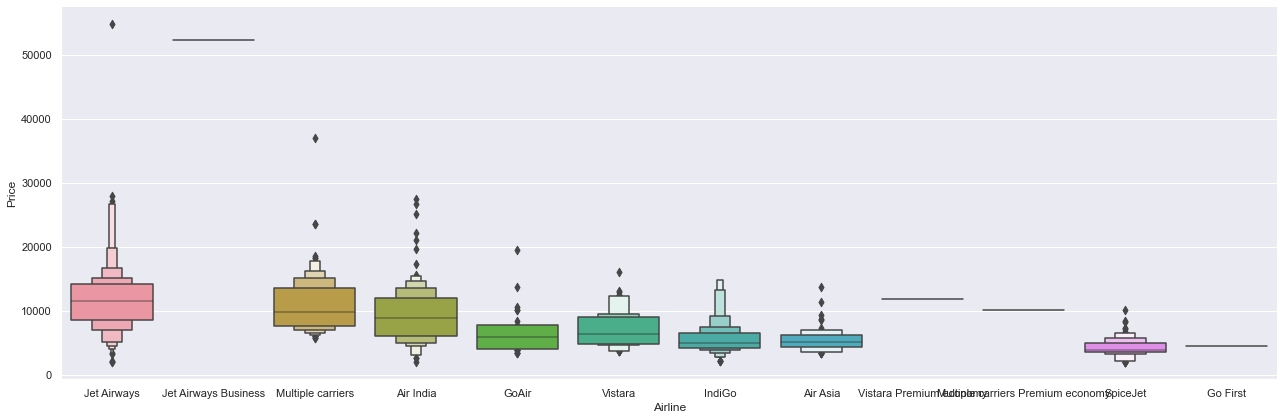

In [16]:
sns.catplot(y = "Price", x = "Airline", data = data.sort_values("Price", ascending = False), kind="boxen", height = 6, aspect = 3)
plt.show()

In [17]:
Airline = data[["Airline"]]

Airline = pd.get_dummies(Airline, drop_first= True)

Airline.head()

,Airline_Air India,Airline_Go First,Airline_GoAir,Airline_IndiGo,Airline_Jet Airways,Airline_Jet Airways Business,Airline_Multiple carriers,Airline_Multiple carriers Premium economy,Airline_SpiceJet,Airline_Vistara,Airline_Vistara Premium economy
0,1,0,0,0,0,0,0,0,0,0,0
1,0,1,0,0,0,0,0,0,0,0,0
2,0,0,0,1,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,1,0,0,0,0,0,0


In [18]:
data["Source"].value_counts()

Delhi        649
Kolkata      372
Banglore     322
Mumbai        84
Chennai       72
New Delhi      2
Name: Source, dtype: int64

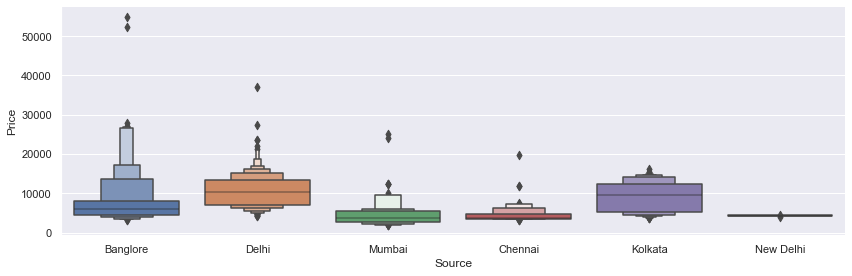

In [19]:
sns.catplot(y = "Price", x = "Source", data = data.sort_values("Price", ascending = False), kind="boxen", height = 4, aspect = 3)
plt.show()

In [20]:
Source = data[["Source"]]

Source = pd.get_dummies(Source, drop_first= True)

Source.head()

,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai,Source_New Delhi
0,0,0,0,0,1
1,0,0,0,0,1
2,0,0,0,0,0
3,0,0,1,0,0
4,0,1,0,0,0


In [21]:
data["Destination"].value_counts()

Cochin       649
Banglore     372
Delhi        186
New Delhi    136
Hyderabad     84
Kolkata       72
Mumbai         1
Bangalore      1
Name: Destination, dtype: int64

In [22]:
Destination = data[["Destination"]]

Destination = pd.get_dummies(Destination, drop_first = True)

Destination.head()

,Destination_Banglore,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_Mumbai,Destination_New Delhi
0,0,0,0,0,0,1,0
1,0,0,0,0,0,0,0
2,0,0,0,0,0,0,1
3,1,0,0,0,0,0,0
4,0,1,0,0,0,0,0


In [23]:
data["Route"]

0                   DEL → BOM
1                   DEL → BLR
2                   BLR → DEL
3       CCU → IXR → BBI → BLR
4       DEL → LKO → BOM → COK
                ...          
1496    CCU → BOM → COK → BLR
1497          DEL → BOM → COK
1498          DEL → HYD → COK
1499    CCU → DEL → COK → BLR
1500    DEL → NAG → BOM → COK
Name: Route, Length: 1501, dtype: object

In [24]:
data.drop(["Route", "Additional_Info"], axis = 1, inplace = True)

In [25]:
data["Total_Stops"].value_counts()

1 stop      799
non-stop    495
2 stops     201
Non-Stop      3
3 stops       3
Name: Total_Stops, dtype: int64

In [26]:
data.replace({"non-stop": 0, "1 stop": 1, "2 stops": 2, "3 stops": 3, "4 stops": 4}, inplace = True)

In [27]:
data.head()

,Airline,Source,Destination,Dep_Time,Arrival_Time,Duration,Total_Stops,Price,Journey_day,Journey_month
0,Air India,New Delhi,Mumbai,07:00:00,09:50:00,2h 50m,Non-Stop,4065,19,8
1,Go First,New Delhi,Bangalore,05:50:00,08:20:00,2h 30M,Non-Stop,4590,27,9
2,IndiGo,Banglore,New Delhi,22:20,01:10 22 Mar,2h 50m,Non-Stop,3897,24,3
3,Air India,Kolkata,Banglore,05:50,13:15,7h 25m,2,7662,1,5
4,Jet Airways,Delhi,Cochin,09:25,04:25 10 Jun,19h,2,13882,9,6


In [28]:
data = pd.concat([data, Airline, Source, Destination], axis = 1)

In [29]:
data.head()

,Airline,Source,Destination,Dep_Time,Arrival_Time,Duration,Total_Stops,Price,Journey_day,Journey_month,...,Source_Kolkata,Source_Mumbai,Source_New Delhi,Destination_Banglore,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_Mumbai,Destination_New Delhi
0,Air India,New Delhi,Mumbai,07:00:00,09:50:00,2h 50m,Non-Stop,4065,19,8,...,0,0,1,0,0,0,0,0,1,0
1,Go First,New Delhi,Bangalore,05:50:00,08:20:00,2h 30M,Non-Stop,4590,27,9,...,0,0,1,0,0,0,0,0,0,0
2,IndiGo,Banglore,New Delhi,22:20,01:10 22 Mar,2h 50m,Non-Stop,3897,24,3,...,0,0,0,0,0,0,0,0,0,1
3,Air India,Kolkata,Banglore,05:50,13:15,7h 25m,2,7662,1,5,...,1,0,0,1,0,0,0,0,0,0
4,Jet Airways,Delhi,Cochin,09:25,04:25 10 Jun,19h,2,13882,9,6,...,0,0,0,0,1,0,0,0,0,0


In [30]:
data.drop(["Airline", "Source", "Destination"], axis = 1, inplace = True)

In [31]:
data.head()

,Dep_Time,Arrival_Time,Duration,Total_Stops,Price,Journey_day,Journey_month,Airline_Air India,Airline_Go First,Airline_GoAir,...,Source_Kolkata,Source_Mumbai,Source_New Delhi,Destination_Banglore,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_Mumbai,Destination_New Delhi
0,07:00:00,09:50:00,2h 50m,Non-Stop,4065,19,8,1,0,0,...,0,0,1,0,0,0,0,0,1,0
1,05:50:00,08:20:00,2h 30M,Non-Stop,4590,27,9,0,1,0,...,0,0,1,0,0,0,0,0,0,0
2,22:20,01:10 22 Mar,2h 50m,Non-Stop,3897,24,3,0,0,0,...,0,0,0,0,0,0,0,0,0,1
3,05:50,13:15,7h 25m,2,7662,1,5,1,0,0,...,1,0,0,1,0,0,0,0,0,0
4,09:25,04:25 10 Jun,19h,2,13882,9,6,0,0,0,...,0,0,0,0,1,0,0,0,0,0


In [32]:
data.shape

(1501, 30)

# Test set

In [33]:
test_data = pd.read_excel("Flight price prediction.xlsx")

In [34]:
test_data.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,Air India,2022-08-19,New Delhi,Mumbai,DEL → BOM,07:00:00,09:50:00,2h 50m,Non-Stop,No info,4065
1,Go First,2022-09-27,New Delhi,Bangalore,DEL → BLR,05:50:00,08:20:00,2h 30M,Non-Stop,No info,4590
2,IndiGo,2022-03-24,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,Non-Stop,No info,3897
3,Air India,2022-05-01,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
4,Jet Airways,2022-06-09,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882


# Feature Selection
Finding out the best feature which will contribute and have good relation with target variable. Following are some of the feature selection methods,

1. **heatmap**
2. **feature_importance_**
3. **SelectKBest**

In [40]:
data.shape

(1501, 30)

In [41]:
data.columns

Index(['Dep_Time', 'Arrival_Time', 'Duration', 'Total_Stops', 'Price',
       'Journey_day', 'Journey_month', 'Airline_Air India', 'Airline_Go First',
       'Airline_GoAir', 'Airline_IndiGo', 'Airline_Jet Airways',
       'Airline_Jet Airways Business', 'Airline_Multiple carriers',
       'Airline_Multiple carriers Premium economy', 'Airline_SpiceJet',
       'Airline_Vistara', 'Airline_Vistara Premium economy', 'Source_Chennai',
       'Source_Delhi', 'Source_Kolkata', 'Source_Mumbai', 'Source_New Delhi',
       'Destination_Banglore', 'Destination_Cochin', 'Destination_Delhi',
       'Destination_Hyderabad', 'Destination_Kolkata', 'Destination_Mumbai',
       'Destination_New Delhi'],
      dtype='object')

In [46]:
X = data.loc[:, ['Dep_Time', 'Arrival_Time', 'Duration', 'Total_Stops', 'Price',
       'Journey_day', 'Journey_month', 'Airline_Air India', 'Airline_Go First',
       'Airline_GoAir', 'Airline_IndiGo', 'Airline_Jet Airways',
       'Airline_Jet Airways Business', 'Airline_Multiple carriers',
       'Airline_Multiple carriers Premium economy', 'Airline_SpiceJet',
       'Airline_Vistara', 'Airline_Vistara Premium economy', 'Source_Chennai',
       'Source_Delhi', 'Source_Kolkata', 'Source_Mumbai', 'Source_New Delhi',
       'Destination_Banglore', 'Destination_Cochin', 'Destination_Delhi',
       'Destination_Hyderabad', 'Destination_Kolkata', 'Destination_Mumbai',
       'Destination_New Delhi']]
X.head()

,Dep_Time,Arrival_Time,Duration,Total_Stops,Price,Journey_day,Journey_month,Airline_Air India,Airline_Go First,Airline_GoAir,...,Source_Kolkata,Source_Mumbai,Source_New Delhi,Destination_Banglore,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_Mumbai,Destination_New Delhi
0,07:00:00,09:50:00,2h 50m,Non-Stop,4065,19,8,1,0,0,...,0,0,1,0,0,0,0,0,1,0
1,05:50:00,08:20:00,2h 30M,Non-Stop,4590,27,9,0,1,0,...,0,0,1,0,0,0,0,0,0,0
2,22:20,01:10 22 Mar,2h 50m,Non-Stop,3897,24,3,0,0,0,...,0,0,0,0,0,0,0,0,0,1
3,05:50,13:15,7h 25m,2,7662,1,5,1,0,0,...,1,0,0,1,0,0,0,0,0,0
4,09:25,04:25 10 Jun,19h,2,13882,9,6,0,0,0,...,0,0,0,0,1,0,0,0,0,0


In [47]:
y = data.iloc[:, 1]
y.head()

0        09:50:00
1        08:20:00
2    01:10 22 Mar
3           13:15
4    04:25 10 Jun
Name: Arrival_Time, dtype: object

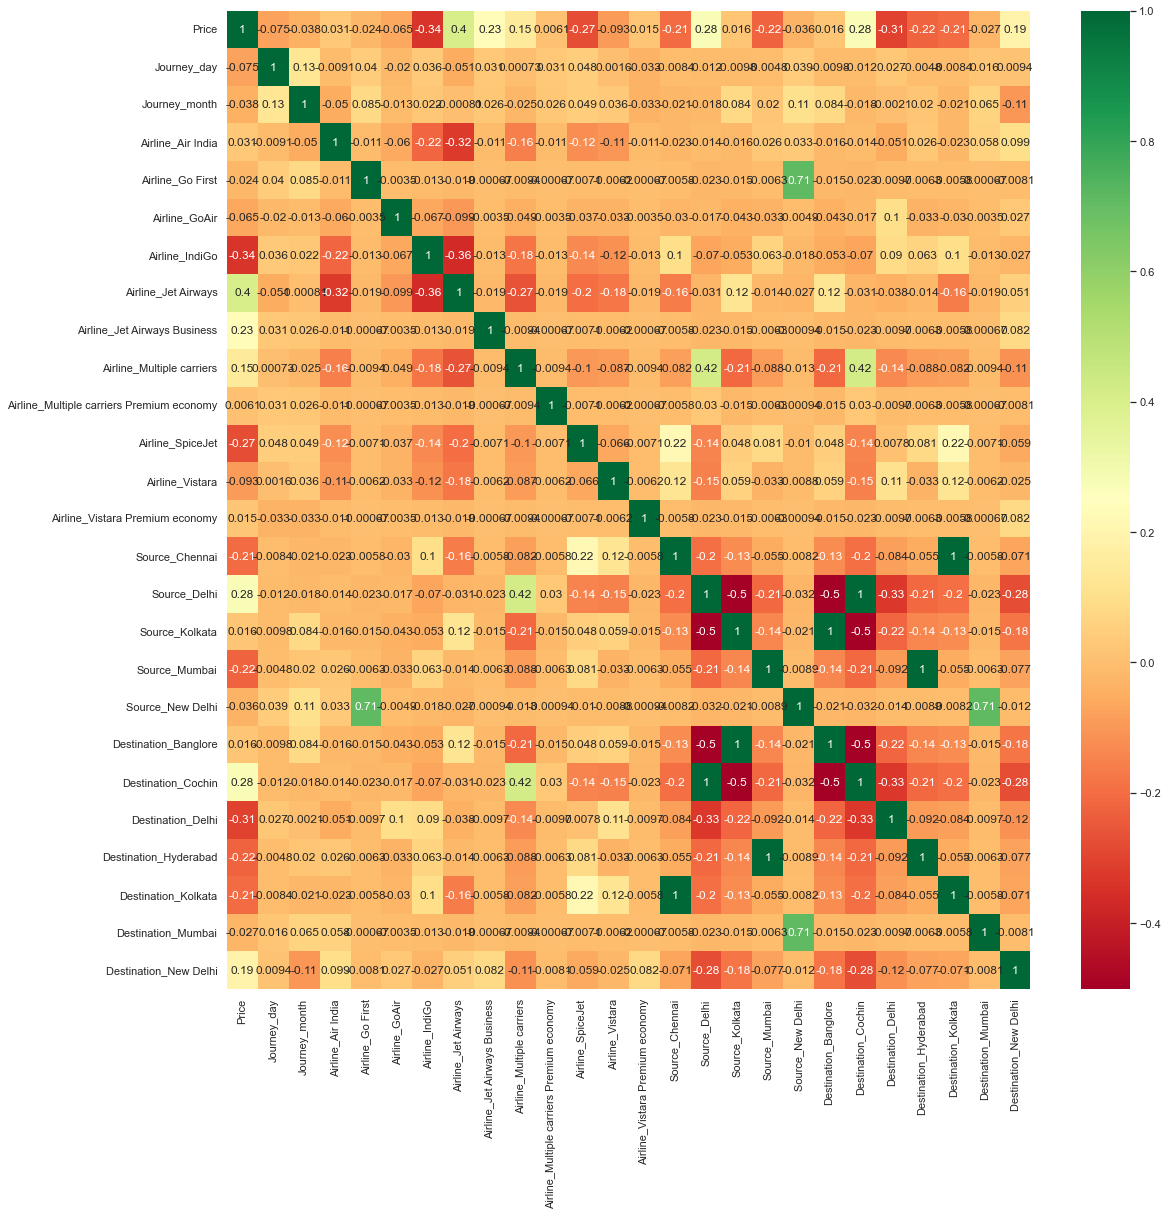

In [48]:
plt.figure(figsize = (18,18))
sns.heatmap(data.corr(), annot = True, cmap = "RdYlGn")

plt.show()

# Hyperparameter Tuning
.Choose following method for hyperparameter tuning
1. RandomizedSearchCV --> Fast
2. GridSearchCV
.Assign hyperparameters in form of dictionery
.Fit the model
.Check best paramters and best score

In [59]:
from sklearn.model_selection import RandomizedSearchCV

In [60]:
#Randomized Search CV

# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 100, stop = 1200, num = 12)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(5, 30, num = 6)]
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10, 15, 100]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 5, 10]

In [61]:
# Create the random grid

random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf}

In [64]:
# Random search of parameters, using 5 fold cross validation, 
# search across 100 different combinations
rf_random = RandomizedSearchCV(estimator = reg_rf, param_distributions = random_grid,scoring='neg_mean_squared_error', n_iter = 10, cv = 5, verbose=2,)

In [65]:
rf_random.fit(X_train,y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=2, min_samples_split=100, n_estimators=1100; total time=   0.0s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=2, min_samples_split=100, n_estimators=1100; total time=   0.0s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=2, min_samples_split=100, n_estimators=1100; total time=   0.0s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=2, min_samples_split=100, n_estimators=1100; total time=   0.0s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=2, min_samples_split=100, n_estimators=1100; total time=   0.0s
[CV] END max_depth=25, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=1000; total time=   0.0s
[CV] END max_depth=25, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=1000; total time=   0.0s
[CV] END max_depth=25, max_features=sqrt, min_samples_leaf=2, min_samples_split=5,

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:372: FitFailedWarning: 
50 fits failed out of a total of 50.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
10 fits failed with the following error:
Traceback (most recent call last):
  File "C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\_forest.py", line 327, in fit
    X, y = self._validate_data(
  File "C:\ProgramData\Anaconda3\lib\site-packages\sklearn\base.py", line 581, in _validate_data
    X, y = check_X_y(X, y, **check_params)
  File "C:\ProgramData\Anaconda3\lib\sit

ValueError: could not convert string to float: '09:35'

In [66]:
rf_random.best_params_

{'n_estimators': 1100,
 'min_samples_split': 100,
 'min_samples_leaf': 2,
 'max_features': 'sqrt',
 'max_depth': 10}

In [71]:
import pickle
# open a file, where you ant to store the data
file = open('flight_rf.pkl', 'wb')

# dump information to that file
pickle.dump(reg_rf, file)